# FIT5196 Assessment 3: Data Integration and Reshaping
#### Student Name: Dahye Kim
#### Student ID: 31356508

Date: 17/11/2020

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment here, e.g.,:
* pandas 
    * Read and manipulate data frame
* tabula 
    * parsing PDF files 
* xlrd 
    * parse excel files 
* bs4 
    * ``BeautifulSoup`` 
    * parse HTML files
* datetime 
    * ``timedelta``
    * perform arithmetic operation on ``hh:mm:ss`` values, utilised for calculating travel duration
* from math import radians, cos, sin, asin, sqrt 
    * calculate haversine distance between two locations using geographical coordinates
* shapefile
    * read shapefiles for geographical data 
* shapely.geometry
    * ``Point``
    * identify the coordinate points from the shapefile 
* shapely.geometry
    * ``polygon.Polygon``
    * retrieve the geographical coordinates to shape a Polygon 
* json 
    * read through json file and parse it as a dictionary format 
* xml.etree.ElementTree
    * parse XML files 
* numpy 
    * advanced arithematic operations, applicable to timedelta variables, original form of NaNs from np.nan

In [1]:
import pandas as pd 
import tabula
from datetime import timedelta
from math import radians, cos, sin, asin, sqrt, exp
import shapefile
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import xlrd
import os 
import json
import xml.etree.ElementTree as ET
import numpy as np
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 
from statsmodels.graphics.gofplots import qqplot

# Introduction 

This program aims to collect data regarding features of properties in a dataset. The features include the suburb the property is located at, shortest distance to areas such as supermarket, train stations, shopping centres, and hospitals. It also includes the travel distance to the CBD Melbourne via the nearest station retrieved from given dataset. After completing the data set on the property, the program builds a model to predict the property price basd on its linear relationship with continuous variables in the dataset. The model aims to evaluate whether the property is overpriced in respect to its surrounding environments and features. 

## Part 1. Completing Real Estate Dataset 

To begin with, the program starts off by parsing the data set of each real eatates seperated into two datasets in different formats - ``json`` and ``xml``. The program first parses ``json`` and ``xml`` files in order to retrieve the data set regarding the given real estates. Two data sets retrieved then are concatenated horizontally based on common columns and their data types. After the concatenation, we check if the new data frame contains any duplicate rows or information. 

## 1.1 JSON Dataset 

``json`` data set is parsed using ``json`` library. ``json`` is a data set with a dictionary format. ``json.load()`` function returns a list of such dictionary - each dictionary represents each row, whose keys are the column name of the data frame, and the values are the matching values of each column in each row. The number of dictionaries within the lits is the number of observations in the data frame. To convert the list of dictionaries into a data frame, I craeted a dictionary whose keys are the column names of the data frame, and the values of each key is an empty list. This list holds the value of each column of each row while looping through each dictionary in the list returned by ``json.load()``. The dictionary is then converted into a data frame directly using ``pd.DataFrame()`` function.

In [2]:
estate1=json.load(open('real_state.json'))
# loat the real_estate dataset in json format 

In [3]:
estate1[0]
# briefly check the first row of the data frame s
# the column names of the data frame are the keys in each dictionary

{'property_id': 27243,
 'lat': -37.586133,
 'lng': 144.925823,
 'addr_street': '53 Creekwood Drive',
 'price': 7520000,
 'property_type': 'house',
 'year': 2010,
 'bedrooms': 5,
 'bathrooms': 2,
 'parking_space': 2}

In [4]:
print(len(estate1))
# the data frame contains 1010 observations 

1010


In [5]:
estate1ColNames = set(estate1[0].keys())
# each dictionary generated by json is a single-row data frame 
# the key of each dictionary is the column name of the data frame 
# retrieve the column name of the property data set
print('There are',len(estate1ColNames),'columns in the data set.\nThe column names are: \n','\n'.join(estate1ColNames))

There are 10 columns in the data set.
The column names are: 
 addr_street
property_id
parking_space
bedrooms
bathrooms
price
year
lng
lat
property_type


In [6]:
estate1Dict=dict()
# the dictionary is utilised for generating readable data frame 

for colName in estate1ColNames:
# loop through each column name retrieved from the json file 

    estate1Dict[colName] = []
    # the list holds the value of each respective column 
    # the column name - list of respective values are the key-value pairs of estate1_dict 
    for i in range(len(estate1)):
    # loop through all the dictionaries returned by json.load() function 
    # json.load() returns a list of dictionaries
        estate1Dict[colName].append(estate1[i][colName])
        # append each column value to the matching dictionary, whose keys are the column name

In [7]:
estate1 = pd.DataFrame(estate1Dict)
#convert the dictionary into data frame 

In [8]:
estate1.head()
# data set is retrieved in a correct data frame format

,addr_street,property_id,parking_space,bedrooms,bathrooms,price,year,lng,lat,property_type
0,53 Creekwood Drive,27243,2,5,2,7520000,2010,144.925823,-37.586133,house
1,7 Graham Street,4626,1,3,1,11509000,2010,144.867456,-37.839729,house
2,36 Linlithgow Street,59897,2,3,1,7048000,2014,145.204568,-37.822338,house
3,1a Lara Street,68890,2,3,2,15620000,2010,145.038746,-37.848827,house
4,7 Scott Street,14750,2,4,3,16200000,2012,144.908492,-37.756802,house


### 1.2 XML Dataset

For the dataset stored in XML format, I parsed it with ``xml.etree.ElementTree`` library. The XML dataset is stored in a tree format - the root is the entire data frame, and the nodes right below the root are the columns. Each column has numbers of child nodes, in this case, each observation. The ``xml`` file is first read in as a string variable, and is then parsed with ``fromstring()`` function. Similar to the parsing method with ``json`` file, I created a dictionary, whose keys are the column names, and the values to each key is the observation in each column. After filling in all the values from the string, the dictionary is converted into a dataframe using ``DataFrame()`` function. 

In [9]:
a =open('real_state.xml').read()
# read the xml file as a string
root=ET.fromstring(a)
# parse through the xml string 

In [10]:
estate2ColNames = [child.tag for child in root]
# each tag of the child node directly under the root is the column name 

rowNo=len(root[1][:])
# the length of each child node is identical
# to avoid omitting repetitive values in the column, I used list for counting the number 
# of rows in the original data frame 

In [11]:
estate2Dict = dict()
# the dictionary is utilised for generating readable data frame 

for colIndex in range(len(estate2ColNames)): 
# loop through each column using the column index 
    estate2Dict[estate2ColNames[colIndex]]=\
    [root[colIndex][rowIndex].text for rowIndex in range(rowNo)]
    # the dictionary holds column name - values key-value pair 
    # the column name is already retrieved using child.tag attribute 
    # loop through each row using row index
    # retrieving the value of each cell - [i] is the column index, [x] is the row index 
    # convert the retrieved cell into a readable format using .text attribute 
    
estate2=pd.DataFrame(estate2Dict)
# convert the dictionary into a data frame

In [12]:
estate2.head()

,property_id,lat,lng,addr_street,price,property_type,year,bedrooms,bathrooms,parking_space
0,71305,-37.85139465,145.2424622,22 Greenock Crescent,5733000,house,2007,4,2,1
1,70908,-37.891133,145.106282,88 Oakpark Drive,12180000,house,2013,4,2,2
2,14081,-37.75450516,144.9260407,216 Pascoe Vale Road,9590000,house,2009,4,2,2
3,33241,-37.73219299,145.0182648,86 Rene Street,5200000,house,2008,2,1,1
4,66413,-37.778123,145.32951599999998,44 Greenslopes Drive,5850000,house,2010,3,1,1


### 1.3 Concatenate and Remove Duplicates

Two data sets above shares the same attribute and same types of domain in each attribute. The concatenation is therefore applied using ``pd.concat`` function. Assuming that each property is assigned with a unique ``property_id``, the duplicate rows are filtered based on the ``property_id`` attribute.

In [13]:
estate =pd.concat([estate1, estate2])
# concatenate the data frame parsed from json and xml files 

In [14]:
dup_estate = estate[estate.duplicated(['property_id'], keep = False)]
# the duplicate rows in the concatenated data frame 
pd.unique(dup_estate['property_id'])
# the property ids that were duplicated 

array([72839, 48895, 47487], dtype=object)

In [15]:
dup_estate
# duplicated data set 
# every second row is a duplicate

,addr_street,property_id,parking_space,bedrooms,bathrooms,price,year,lng,lat,property_type
316,11 Battalion Court,72839,2,3,1,4620000,2015,145.289,-37.8416,house
632,1/9 Mangan Street,48895,2,3,2,23360000,2013,145.082,-37.812,house
830,11 Battalion Court,72839,2,3,1,4620000,2015,145.289,-37.8416,house
837,1/9 Mangan Street,48895,2,3,2,23360000,2013,145.082,-37.812,house
947,71 Bridge Street,47487,1,2,1,8330000,2011,145.147,-37.7188,house
977,71 Bridge Street,47487,1,2,1,8330000,2011,145.147,-37.7188,house


In [16]:
estate.drop(estate.index[[316,632,947]], inplace = True)
# retrieve the index of every second row from the duplicated set of data 
# drop the matching row from the original data set

In [17]:
estate.reset_index(inplace = True, drop = True)
# reset the row index after dropping duplicate rows 

In [18]:
estate['lat']=estate['lat'].apply(lambda x: float(x))
# convert the values in the latitude column into floating values 
estate['lng']=estate['lng'].apply(lambda x: float(x))
# convert the values in the longitude column into floating values 

### 1.4 Add Columns and Set Default Values

In [19]:
estate['Shopping_center_id'] = 'not available'
estate['Train_station_id'] =0
estate['Distance_to_sc']=0
estate['travel_min_to_CBD']=0
estate['Transfer_flag']=-1
estate['Hospital_id'] = 'not available'
estate['Distance_to_hospital']=0
estate['Supermarket_id'] = 'not available'
estate['Distance_to_supermarket']=0
estate['Distance_to_train_station']=0

## Part 2. Calculating the Distance between the Property and a Location

Four locations are considered for each property - supermarket, shopping centre, hospital, and train station. The information on the geographical coordinate and its ID are given in different formats, and thus they are all parsed using different libraries and functions. 

After parsing the data sets of each location, I looked for the nearest location to each property and the distance between them in order to fill in respective columns. The distance is calculated using ``haversine`` distance, and the nearest location to the property is calculated using ``DistanceCalc`` function below. The ``DistanceCalc`` function calculates the distance between all properties and a location given and returns a data frame composed of the nearest location ID and the distance between the location and the property. The returned data frame from this function directly replaced the respective columns.

In [20]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6378 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [21]:
def DistanceCalc(idcol, latcol, loncol, df):

    '''
    This function calculates the distance between all properties and a location 
    given and returns a data frame composed of the nearest location ID and the 
    distance between the location and the property. The function takes four
    input parameters: 

    idcol - the column name of the location ID 
    latcol - the column name of the location latitude 
    loncol - the column name of the location longitude 
    df - the data frame composed of the information regarding the location
    '''
    lst = []

    for i in range(estate.shape[0]): 
    # iterate through every single row of the estate data frame, each property 

        lat = estate.loc[i,'lat']
        # latitude of the property 
        long = estate.loc[i, 'lng']
        # longitude of the property 
        distToProp = dict()
        # the dictionary that stores the distance between the property and every single 
        # location coordinates from the input data frame df 

        for x in range(df.shape[0]): 
        # loop through the df, each and every location specified
        
            stopID = df.loc[x, idcol]
            # the ID of each location 
            stopLat = df.loc[x, latcol]
            # the latitude of each location 
            stopLon = df.loc[x, loncol]
            # the longitude of each station

            distToProp[stopID] = round(haversine(long, lat, stopLon, stopLat)*1000)
            # calculate the haversine distance using haversine function and coordinates of
            # each location and the property in loop 
            # the distance is stored in the dictionary with the matching location ID as the 
            # key to the distance 
            # the unit of the returned value should be in meters
            
        lst.append(distToProp)
        # the dictionary of each property with the distance of all the locations are stored 
        # in the list called lst. This is for maintaining the order of the estate data frame 
        
    trainDist = pd.DataFrame(lst)
    # transform the list with all the dictionary into a data frame
    # the data frame's column is the ID of the location input 
    # each row represent each property, the single cell of each row and column is the distance 
    # between the respective property and location 
    
    trainDist = pd.concat([trainDist.min(axis =1),trainDist.idxmin(axis=1)], axis =1)
    # .min(axis=1) returns the minimum value of each row, in this case, the shortest 
    # distance from a location to the property 
    # .idxmin(axis =1) returns the column name whose row is the lowest in respect to other 
    # columns. In this case, is the location ID
    trainDist.columns = ['distance','ID']
    # assign column names to the data frame
    # trainDist data frame is returned by the function at the end. 
    # the data frame contains the nearest location ID to the property and the distance 
    # between the forementioned places. 

    return trainDist       

### 2.1 Hospitals

The data frame on the coordinates and relavant information on hospitals were stored in a ``pdf`` format. I used ``tabula`` library to parse this data frame. 

In [22]:
hospitals = tabula.read_pdf('hospitals.pdf', pages = 1)[0]
# the data frame with the geographical information of the hopsitals is the only table in the first page of the pdf 

In [23]:
hospitals.head()
# the parameters eneded for DistanceCalc are lat, lng, and id

,Unnamed: 0,id,lat,lng,name
0,0,hospital_001,-37.990622,145.072836,Como Private Hospital
1,1,hospital_002,-37.855469,145.268183,Mountain District Private Hospital
2,2,hospital_003,-37.792230,144.889128,Western Hospital
3,3,hospital_004,-37.756042,145.061896,Mercy Hospital for Women
4,4,hospital_005,-37.760623,144.815624,Sunshine Hospital


In [24]:
minHosp = DistanceCalc('id', 'lat', 'lng', hospitals)
# minHosp is a dataframe, composed of the distance between each property and the nearest hospital

In [25]:
estate.Distance_to_hospital= minHosp.distance
# fill the distance to hospital values to respective properties 
estate.Hospital_id = minHosp.ID
# fill the ID of the nearst hospital to each property 

In [26]:
estate.Hospital_id[estate.Hospital_id.isna()]
# all properties are assigned with a nearest hospital 

Series([], Name: Hospital_id, dtype: object)

In [27]:
estate.Distance_to_hospital[estate.Hospital_id.isna()]
# all properties are assigned with a nearest hospital, and the distance between two locations are calculated without 
# missing values 

Series([], Name: Distance_to_hospital, dtype: int64)

In [28]:
estate.head()

,addr_street,property_id,parking_space,bedrooms,bathrooms,price,year,lng,lat,property_type,Shopping_center_id,Train_station_id,Distance_to_sc,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Distance_to_train_station
0,53 Creekwood Drive,27243,2,5,2,7520000,2010,144.925823,-37.586133,house,not available,0,0,0,-1,hospital_041,16840,not available,0,0
1,7 Graham Street,4626,1,3,1,11509000,2010,144.867456,-37.839729,house,not available,0,0,0,-1,hospital_003,5620,not available,0,0
2,36 Linlithgow Street,59897,2,3,1,7048000,2014,145.204568,-37.822338,house,not available,0,0,0,-1,hospital_010,1612,not available,0,0
3,1a Lara Street,68890,2,3,2,15620000,2010,145.038746,-37.848827,house,not available,0,0,0,-1,hospital_012,3574,not available,0,0
4,7 Scott Street,14750,2,4,3,16200000,2012,144.908492,-37.756802,house,not available,0,0,0,-1,hospital_007,2402,not available,0,0


### 2.2 Supermarkets

The geographical coordinates and the relevant information of each supermarket was stored in an excel format. ``parse`` function from ``xlrd`` and ``ExcelFile`` from ``pandas`` were utilised for parsing the data frame from an excel file.

In [29]:
supermarkt = pd.ExcelFile('supermarkets.xlsx').parse(0)
# parse the first sheet of the excel file

In [30]:
minSup = DistanceCalc(idcol='id', latcol='lat', loncol='lng', df=supermarkt)
# calculate the distance between the property and the nearest supermarket 

In [31]:
estate.Supermarket_id = minSup.ID
# assign the nearest supermarket ID to respective properties 
estate.Distance_to_supermarket= minSup.distance
# fill i nthe distance between each property and its nearest supermarket 

### 2.3 Shopping Centres 

The information of each shopping centre is stored in ``html`` format. I parsed the data frame in ``html`` format first by reading it in as a string. Then, with ``BeautifulSoup`` library, I used ``lxml`` parser to generate a data frame with readable tags and structure. The rows and columns of the data frame are parsed based on different html tags using ``find()`` and ``findAll`` function from ``BeautifulSoup``. 

In [32]:
HtmlFile = open('shopingcenters.html', 'r', encoding='utf-8')
# first read the contents within the HTML file as a string
source_code = HtmlFile.read()
# retrieve the source code of the HTML file from the read-in string
soup = BeautifulSoup(source_code, 'lxml')
# using lxml parser with BeautifulSoup for faster and efficient parsing procedure 

In [33]:
shopCol = [colName.text for colName in soup.find('thead').findAll('th')[1:4]]
# all the 'th' tags in 'thead' code are the table headings, aka column names 
# parsing only the 'th' tags with the column names in between, store it into shopCol list 

rows = soup.find('tbody').findAll('td')
# the values of each row is stored in 'td' tags, each row is seperated by 'td' tags 
# 'rows' contains all the contents in 'td' tags parsed by BeautifulSoup

In [34]:
rows[0:9]

[<td>SC_001</td>,
 <td>-37.767915</td>,
 <td>145.041790</td>,
 <td>SC_002</td>,
 <td>-37.819375</td>,
 <td>145.171472</td>,
 <td>SC_003</td>,
 <td>-37.971131</td>,
 <td>145.089065</td>]

In [35]:
shopDict = dict()
# shopDict dictionary stores column-row value pairs 
# the column names are the keys of the dictionary, each key is assigned with a list of values 

for colNum in range(0, len(shopCol)):
# looping through each column via index 
    shopDict[shopCol[colNum]] = []
    # assigning an empty lits for each column for holding all the observations 
    
    for i in range(colNum, len(rows),3):
    # looping through each row/observations with 'td' tags
    # three 'td' tags are one row, and thus the loop use step = 3 to loop through each row 
        shopDict[shopCol[colNum]].append(rows[i].text)
        # append the texts converted from the tags into the respective column list in the dictionary 

In [36]:
for key in shopDict.keys(): 
    print(key, shopDict[key][0:10], shopDict[key][-10:],'\n')
# all columns and values are parsed correctly
# the latitutde and longitude are stored as strings

sc_id ['SC_001', 'SC_002', 'SC_003', 'SC_004', 'SC_005', 'SC_006', 'SC_007', 'SC_008', 'SC_009', 'SC_010'] ['SC_110', 'SC_111', 'SC_112', 'SC_113', 'SC_114', 'SC_115', 'SC_116', 'SC_117', 'SC_118', 'SC_119'] 

lat ['-37.767915', '-37.819375', '-37.971131', '-35.280406', '-37.574572', '-38.355943', '-37.812680', '-37.811846', '-37.765650', '-37.714111'] ['-37.598170', '-37.688846', '-37.987088', '-38.147548', '-38.098450', '-38.014916', '43.105259', '-38.005454', '-37.486265', '-37.781450'] 

lng ['145.041790', '145.171472', '145.089065', '149.132550', '144.920451', '144.907320', '144.962905', '144.969834', '145.091914', '144.886988'] ['144.939848', '144.603808', '145.215066', '144.362528', '145.293123', '145.323404', '-76.091619', '145.217573', '144.589067', '145.618270'] 



In [37]:
print('Number of rows in each column: ')
print(', '.join('{}'.format(len(val)) for val in shopDict.values()))
# all columns have the same number of observations 

Number of rows in each column: 
119, 119, 119


In [38]:
SC = pd.DataFrame(shopDict)
# convert the dictionary parsed from html into a data frame 

In [39]:
SC.lat = SC.lat.apply(lambda x: float(x))
SC.lng = SC.lng.apply(lambda x: float(x))
# convert the latitude and longitude values from strings to floating numbers 

In [40]:
minSC = DistanceCalc(idcol='sc_id', latcol='lat', loncol='lng', df=SC)
# calculate the distance from each property to the nearest shopping centre 
# minSC is a data frame composed of the nearest shopping centre ID and its distance from each property 

In [41]:
estate.Distance_to_sc= minSC.distance
# fill the distance to the nearest shopping centre
estate.Shopping_center_id = minSC.ID
# fill the ID of the nearest shopping centre of each property 

### 2.4 Suburb

The information regarding suburbs in the region is stored as geographical shape file. To parse these data into a readable data frame, I used ``shapefile`` library. All the text data regarding each suburb is returned by ``.record()`` function, and the geographical coordinate of each suburb is returned by ``.shape()`` function. 

To look for the suburb that each property is located at, I looped through both the text information returned by ``.record()`` function in order to obtain each suburb's names. The names of each suburb was the sixth element in each array returned from ``.record()`` function.

The ``shape()`` function returns a list of tuple, each tuple consist of a geographical coordinate. Each list is the coordinates that shapes the polygon of the suburb, whose has the same index in the list returned by ``.record()`` function. To match each suburb to its polygons, I looped through each row of both data sets are turned the list of tuples into tuple of tuples for efficiency. 

After obtaining the polygon of all the suburbs, I looped through each property in the ``estate`` data set in order to look for the suburb it belongs to by using ``contain()`` function. If the latitude and longitude of the property is within the polygon of the suburb, the property is located within the suburb. 

In [42]:
sf = shapefile.Reader('VIC_LOCALITY_POLYGON_shp')
# read in all the geographical data files whose prefix of the file name starts with 'VIC_LOCALITY_POLYGON_shp'

In [43]:
suburbRecords = sf.records()
# the information regarding all the suburbs are called with records() function 
suburbShape = sf.shapes()
# shapes() returns all the geographical coordinates for generating the polygon of each location

In [44]:
suburbRecords[1:10]
# Each record line represent each row in the data frame 
# The seventh cell in the row is the suburb name, 
# and the suburb with its matching coordinates is the information we need.

[Record #1: ['6671', datetime.date(2011, 8, 31), None, 'VIC1986', datetime.date(2012, 4, 27), None, 'NURRAN', '', '', 'G', None, '2'],
 Record #2: ['6672', datetime.date(2011, 8, 31), None, 'VIC2862', datetime.date(2012, 4, 27), None, 'WOORNDOO', '', '', 'G', None, '2'],
 Record #3: ['6673', datetime.date(2011, 8, 31), None, 'VIC734', datetime.date(2017, 8, 9), None, 'DEPTFORD', '', '', 'G', None, '2'],
 Record #4: ['6674', datetime.date(2011, 8, 31), None, 'VIC2900', datetime.date(2012, 4, 27), None, 'YANAC', '', '', 'G', None, '2'],
 Record #5: ['6405', datetime.date(2011, 8, 31), None, 'VIC1688', datetime.date(2012, 4, 27), None, 'MINIMAY', '', '', 'G', None, '2'],
 Record #6: ['6451', datetime.date(2011, 8, 31), None, 'VIC999', datetime.date(2012, 4, 27), None, 'GLEN FORBES', '', '', 'G', None, '2'],
 Record #7: ['6452', datetime.date(2011, 8, 31), None, 'VIC7', datetime.date(2012, 4, 27), None, 'ADAMS ESTATE', '', '', 'G', None, '2'],
 Record #8: ['6465', datetime.date(2011, 8, 31

In [45]:
suburbShape[1].points[1:10]
# suburbShape returns a list of tuples, each tuple is a geographical coordinate

[(148.66876202, -37.39571345),
 (148.66848331, -37.39576293),
 (148.66821178, -37.39581231),
 (148.66789227, -37.3959711),
 (148.66766529, -37.39609431),
 (148.66754021, -37.3962906),
 (148.66745957, -37.396555),
 (148.66732943, -37.39685439),
 (148.66719625, -37.39700499)]

In [46]:
suburbToPolygon = dict()
# the dictionary stores the coordinates of each suburb, which is in need to shape a Polygon

for i in range(len(suburbRecords)): 
# loop through each row of the data frame 
    suburbToPolygon[suburbRecords[i][6]] = tuple(suburbShape[i].points)
    # the 7th element from each row is the suburb name. 
    # each suburb name is the key in suburbToPolygon dictionary 
    # the value to each key is the tuple of all the coordinates required to shape a Polygon of the suburb

In [47]:
estate['suburb'] = np.nan
# create a column 'suburb' to estate data frame 
# this is to record the matching suburb of each property in the upcoming code chunk 

In [48]:
for i in range(estate.shape[0]): 
# looping through property in the estate data frame 
    longitude = estate.loc[i,'lng']
    # longitude of the property in loop 
    latitude = estate.loc[i,'lat']
    # latitude of the property in loop 

    for x in suburbToPolygon.keys(): 
    # for each property, we loop through the dictionary with the suburb names and their respective coordinates 
    # we then look for the suburb whose polygon contains the latitude and longitude of the property in the loop 

        if Polygon(suburbToPolygon[x]).contains(Point(longitude, latitude)): 
        # if the polygon includes the latitude and longitude of the property retrieved above 
            estate.loc[i, 'suburb'] = x.capitalize()
            # then the property's suburb is the key of the dictionary 

In [49]:
estate.head()
# the suburb of each property is filled in.

,addr_street,property_id,parking_space,bedrooms,bathrooms,price,year,lng,lat,property_type,...,Train_station_id,Distance_to_sc,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Distance_to_train_station,suburb
0,53 Creekwood Drive,27243,2,5,2,7520000,2010,144.925823,-37.586133,house,...,0,1297,0,-1,hospital_041,16840,S_178,1135,0,Craigieburn
1,7 Graham Street,4626,1,3,1,11509000,2010,144.867456,-37.839729,house,...,0,2329,0,-1,hospital_003,5620,S_056,1909,0,Newport
2,36 Linlithgow Street,59897,2,3,1,7048000,2014,145.204568,-37.822338,house,...,0,2223,0,-1,hospital_010,1612,S_040,2421,0,Mitcham
3,1a Lara Street,68890,2,3,2,15620000,2010,145.038746,-37.848827,house,...,0,2833,0,-1,hospital_012,3574,S_235,1531,0,Malvern
4,7 Scott Street,14750,2,4,3,16200000,2012,144.908492,-37.756802,house,...,0,2504,0,-1,hospital_007,2402,S_197,1377,0,Essendon


### 2.5 Train Station

The information on the nearest stop is stored as a text data. When I opened the text data using ``open()`` function, I could see that each column and rows were seperated by comma, and was stored in exactly the same structure as a ``csv`` format. ``pd.read_csv`` format, therefore, directly could read in the text file and convert it into a readable data frame. The nearest station and the distance between it and respective property was calcualted using ``DistanceCalc`` funciton.

In [50]:
open('stops.txt').readlines()[1:10]

['"15351","Sunbury Railway Station","Sunbury","-37.5790909705787","144.727318781329"\n',
 '"15353","Diggers Rest Railway Station","Diggers Rest","-37.6270165149357","144.719922441113"\n',
 '"19827","Stony Point Railway Station","Crib Point","-38.3742345364937","145.221837462187"\n',
 '"19828","Crib Point Railway Station","Crib Point","-38.3661233827862","145.204043321601"\n',
 '"19829","Morradoo Railway Station","Crib Point","-38.3540333365844","145.189602487712"\n',
 '"19830","Bittern Railway Station","Bittern","-38.3373903202406","145.178026527511"\n',
 '"19831","Hastings Railway Station","Hastings","-38.3056585273722","145.185979882012"\n',
 '"19832","Tyabb Railway Station","Tyabb","-38.2598150046916","145.186400708984"\n',
 '"19833","Somerville Railway Station","Somerville","-38.2253419593114","145.1762449189"\n']

In [51]:
stops = pd.read_csv('stops.txt')

In [52]:
distance_ID = DistanceCalc(idcol = 'stop_id',\
            latcol = 'stop_lat',\
            loncol = 'stop_lon',\
            df = stops)

# calculate the distance from each property to the nearest train stop

In [53]:
estate['Distance_to_train_station']=distance_ID['distance']
# fill the distance to the nearest stops
estate.Train_station_id=distance_ID['ID']
# fill the stop ID of the nereast stops to the respective properties 

## Part 3. Travel Duration and Transfer Flags 

The transfer flags refers to whether the nearest station from a property offers a direct trip to Flinders Street Station without any transits in train lines. These trips should be run during the rush hours in the mornings, every weekday between 7 to 9am. The travel duration, which is the travel time between the property to Flinders Street Station from the nearest station by train, refers to the average travel time of all the trips occurs between 7 to 9am between two stations. 

Four datasets are given in order to obtain these two columns: 

* ``routes`` - refers to the route a train takes between two major stations. Depending on long- or short-distance train, each route can have multiple trips in different stop stations.  

* ``calendar`` - the operating days of a week of each service line  

* ``trip`` - the trips between each route. The information includes the direction of a trip - outbound or inbound  

* ``stop_times`` - the running time and sequence of each trip. This includes the stops that are run within each trip  

To approach this problem, we should first start by filtering out the service lines runs through the timeframe that is needed to our calculation. Therefore, the first step I took was to obtain the train service line that runs every single week days using ``calendar`` data set. 

Then, we need to start exploring the 'relationship' amongst the data set: each route can have multiple trips, and each trip has different stoptimes. ``trips`` have foreign keys from ``routes``, and ``stop_times`` has foreign keys from both ``routes`` and ``trips``. ``trips`` is the only data frame with the information on the service lines. ``stop_times`` also has foreign keys from ``stops`` data set. Therefore, we can merge ``routes`` to ``trips``, and then merge the new data frame with ``stop_times`` in order to understand the running information of the service lines and obtain the running times of the service line that we actually need.

### 3.1 Travel Itinerary - Merging Four Data Frames 

In [54]:
routes = pd.read_csv('routes.txt')
calendar = pd.read_csv('calendar.txt')
trip = pd.read_csv('trips.txt')
stoptimes = pd.read_csv('stop_times.txt')

In [55]:
calendar.head()

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,T2,0,0,0,0,0,1,0,20151009,20151011
1,UJ,0,0,0,0,0,0,1,20151009,20151011
2,T6,0,0,0,0,1,0,0,20151009,20151011
3,T5,1,1,1,1,0,0,0,20151012,20151015
4,T2_1,0,0,0,0,0,1,0,20151016,20151018


In [56]:
routes.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,2-ALM-B-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
1,2-ALM-C-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
2,2-ALM-D-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
3,2-ALM-E-mjp-1,1,Alamein,Alamein - City (Flinders Street),2
4,2-ALM-F-mjp-1,1,Alamein,Alamein - City (Flinders Street),2


In [57]:
trip.head()

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,2-ALM-F-mjp-1,T0,17067982.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
1,2-ALM-F-mjp-1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
2,2-ALM-F-mjp-1,T0,17067992.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
3,2-ALM-F-mjp-1,T0,17067999.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0
4,2-ALM-F-mjp-1,T0,17068003.T0.2-ALM-F-mjp-1.1.H,2-ALM-F-mjp-1.1.H,City (Flinders Street),0


In [58]:
stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,17182517.T2.2-ALM-B-mjp-1.1.H,04:57:00,04:57:00,19847,1,NaN,0,0,0.000000
1,17182517.T2.2-ALM-B-mjp-1.1.H,04:58:00,04:58:00,19848,2,NaN,0,0,723.017818
2,17182517.T2.2-ALM-B-mjp-1.1.H,05:00:00,05:00:00,19849,3,NaN,0,0,1951.735072
3,17182517.T2.2-ALM-B-mjp-1.1.H,05:02:00,05:02:00,19850,4,NaN,0,0,2899.073349
4,17182517.T2.2-ALM-B-mjp-1.1.H,05:04:00,05:04:00,19851,5,NaN,0,0,3927.090952


In [59]:
# keeping the original data frames before merging 
route_o = routes.copy()
trip_o = trip.copy()
stoptimes_o = stoptimes.copy()

In [60]:
calendar.weekdayFreq = calendar.apply(lambda x: sum(x.iloc[[1,2,3,4,5]]), axis = 1)
# sum of the number of days in weekdays each service runs 
# if the service line runs every day between Monday to Friday, weekdayFreq equals 5
calendar.service_id[calendar.weekdayFreq==5]
# the service line ID who runs from Monday to Friday 
# T0 is the only service line that runs every single weekday

<ipython-input-60-8442368b5427>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  calendar.weekdayFreq = calendar.apply(lambda x: sum(x.iloc[[1,2,3,4,5]]), axis = 1)


8    T0
Name: service_id, dtype: object

In [61]:
trip =trip[trip.service_id=='T0']
# filter out all the trips that are not run by T0 
trip.drop(['service_id','shape_id'], axis = 1, inplace = True)
# drop the columns that are not necessary for the wrangling process 

In [62]:
estate.Transfer_flag[estate.Train_station_id == 19854] = 0
# all the properties whose nearest station is the Flinders Station itself will have the transfer_flat = 0 
estate.travel_min_to_CBD[estate.Train_station_id == 19854] = 0
# all the properties whose nearest station is the Flinders Station itself will have the travel minute to CBD = 0

<ipython-input-62-0a040ad3185e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estate.Transfer_flag[estate.Train_station_id == 19854] = 0
<ipython-input-62-0a040ad3185e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estate.travel_min_to_CBD[estate.Train_station_id == 19854] = 0


In [63]:
routes.drop(['route_type', 'agency_id', 'route_short_name'], axis = 1, inplace = True)
# remove all the unncessary column from routes before merging the table 

In [64]:
trip = pd.merge(trip, routes, on = 'route_id')
# merging from macrolevel to microlevel 
# inner merge with the route id 

In [65]:
stoptimes.drop(['stop_headsign','pickup_type','drop_off_type','shape_dist_traveled'], 
              axis=1, inplace = True)
# drop the columns that are not necessary for the wrangling process 

In [66]:
stoptimes['departure_time']=pd.to_timedelta(stoptimes['departure_time'])
stoptimes['arrival_time']=pd.to_timedelta(stoptimes['arrival_time'])
# convert the string time variables into timedelta format in order to perform arithematic operation and 
# use logical equations 

In [67]:
stoptimes = stoptimes[(stoptimes.departure_time <='09:00:00')&\
         (stoptimes.departure_time >='07:00:00')]
# filter out the itineraries outside of the range betwen 7 to 9am

In [68]:
stoptimes = pd.merge(stoptimes, stops[['stop_id', 'stop_name']], on = 'stop_id')
# merge the stop names with the stop times in order to verify the stations that the service line passes in a trip

In [69]:
stoptimes = pd.merge(stoptimes, trip, on = 'trip_id')
# merge from macro-level to microlevel 
# inner merge based on common column, the trip_id

In [70]:
stoptimes = stoptimes[['route_id','trip_id', 'departure_time', 'arrival_time', 'stop_sequence',\
             'stop_id','stop_name','trip_headsign', 'direction_id','route_long_name']]
# reorder the stoptimes column to a more relevant order of each column

In [71]:
stoptimes.head()

,route_id,trip_id,departure_time,arrival_time,stop_sequence,stop_id,stop_name,trip_headsign,direction_id,route_long_name
0,2-ALM-F-mjp-1,17068387.T0.2-ALM-F-mjp-1.2.H,0 days 07:10:00,0 days 07:10:00,6,19852,Riversdale Railway Station,City (Flinders Street),0,Alamein - City (Flinders Street)
1,2-ALM-F-mjp-1,17068387.T0.2-ALM-F-mjp-1.2.H,0 days 07:13:00,0 days 07:13:00,7,19853,Camberwell Railway Station,City (Flinders Street),0,Alamein - City (Flinders Street)
2,2-ALM-F-mjp-1,17068387.T0.2-ALM-F-mjp-1.2.H,0 days 07:01:00,0 days 07:01:00,1,19847,Alamein Railway Station,City (Flinders Street),0,Alamein - City (Flinders Street)
3,2-ALM-F-mjp-1,17068387.T0.2-ALM-F-mjp-1.2.H,0 days 07:02:00,0 days 07:02:00,2,19848,Ashburton Railway Station,City (Flinders Street),0,Alamein - City (Flinders Street)
4,2-ALM-F-mjp-1,17068387.T0.2-ALM-F-mjp-1.2.H,0 days 07:04:00,0 days 07:04:00,3,19849,Burwood Railway Station,City (Flinders Street),0,Alamein - City (Flinders Street)


### 3.2 Trips and stops 

After merging four data frames, we obtained the trips that runs only during the weekdays, and filtered out the time frame that we do not need for the new columns. Additionally, we can see the ``stop_sequence`` of the ``stoptimes`` data frame shows us the order that each trains stops in each trip. To obtain the transfer flag and the travel duration, we need to figure out whether the nearest station of a property is involved in a trip that is heading towards Flinders Street Station, and whether the sequence of the nearest station is earlier than the sequence stop of the Flinders Street Station. 

Therefore, I sorted the data frame by ``trip_id``. For rows with identical ``trip_id``, I sorted them using ``stop_sequence``. A property with ``transfer_flag == 0`` satisfy the following property: 

1. The nearest station has a trip runs to Flinders Street Station 
2. Within the trip, the sequence of the nearest station should be earlier than the Flinders Street Station

To identify this, I first created a dictionary ``trip_stop``, whose keys are the unique ``trip_id``, and the values are the tuples of stops involved within that trip.

In [72]:
stoptimes.sort_values(by = ['trip_id','stop_sequence'], inplace = True)
# trip_id has a series of stop_sequence, which indicates the direction of a train's travel 
# sort the data frame based on the trip_id. If the trip_ids are identical, sort them based on the stop_sequence 

In [73]:
stoptimes.head()
# data frame is sorted based on the trip_id and stop_sequence

,route_id,trip_id,departure_time,arrival_time,stop_sequence,stop_id,stop_name,trip_headsign,direction_id,route_long_name
4211,2-EPP-F-mjp-1,17067064.T0.2-EPP-F-mjp-1.8.R,0 days 07:00:00,0 days 06:58:00,22,19854,Flinders Street Railway Station,City (Flinders Street),1,City (Flinders Street) - South Morang
4210,2-EPP-F-mjp-1,17067064.T0.2-EPP-F-mjp-1.8.R,0 days 07:03:00,0 days 07:03:00,23,22180,Southern Cross Railway Station,City (Flinders Street),1,City (Flinders Street) - South Morang
4209,2-EPP-F-mjp-1,17067064.T0.2-EPP-F-mjp-1.8.R,0 days 07:05:00,0 days 07:05:00,24,19841,Flagstaff Railway Station,City (Flinders Street),1,City (Flinders Street) - South Morang
4208,2-EPP-F-mjp-1,17067064.T0.2-EPP-F-mjp-1.8.R,0 days 07:07:00,0 days 07:07:00,25,19842,Melbourne Central Railway Station,City (Flinders Street),1,City (Flinders Street) - South Morang
4207,2-EPP-F-mjp-1,17067064.T0.2-EPP-F-mjp-1.8.R,0 days 07:08:00,0 days 07:08:00,26,19843,Parliament Railway Station,City (Flinders Street),1,City (Flinders Street) - South Morang


In [74]:
trip_stop = dict()
# dictionary to keep the trip_id and all the stops that are involved within that particular trip 
# the key is the trip_id, and the value to each key is a tuple of all the stops involved in the trip 

for i in pd.unique(stoptimes.trip_id): 
# looping through each unique trip_id
    trip_stop[i] = tuple(stoptimes.stop_id[stoptimes.trip_id==i])
    # the stop_ids in the unique trip_id is stored as a tuple
    # the tuple is not mutable, but can the input values in order of sequence
    # it's a better choice to maintain the stop_sequence of a trip while recording all the stops involved 

In [75]:
print(*trip_stop['17067069.T0.2-EPP-F-mjp-1.8.R'])

20016 20017 20019 19974 19975 19976 19977 19978 19979 19854 22180 19841 19842 19843


In [76]:
print('Trip ID 17067064.T0.2-EPP-F-mjp-1.8.R travels via:\n')
print('\n'.join('{}-{}'.format(stop, stops.stop_name[stops.stop_id == stop].values[0]) \
                for stop in trip_stop['17067064.T0.2-EPP-F-mjp-1.8.R']))

print('\n',stoptimes.stop_name[stoptimes.trip_id == '17067064.T0.2-EPP-F-mjp-1.8.R'])

# the sequence of stops stored in the tuple matches the sequence in the stop_times data frame 

Trip ID 17067064.T0.2-EPP-F-mjp-1.8.R travels via:

19854-Flinders Street Railway Station
22180-Southern Cross Railway Station
19841-Flagstaff Railway Station
19842-Melbourne Central Railway Station
19843-Parliament Railway Station

 4211      Flinders Street Railway Station
4210       Southern Cross Railway Station
4209            Flagstaff Railway Station
4208    Melbourne Central Railway Station
4207           Parliament Railway Station
Name: stop_name, dtype: object


### 3.3 Transfer Flag

A property with ``transfer_flag == 0`` satisfy the following property: 

1. The nearest station has a trip runs to Flinders Street Station 
2. Within the trip, the sequence of the nearest station should be earlier than the Flinders Street Station

This means that we need first to check (1) if a tuple of a trip includes the ``stop_id`` of the nearest station of a property. If so, (2) we need to check if the tuple has the ``stop_id`` of the Flinders Street Station. If this is satisfied, (3) we need to see whether the index of the ``stop_id`` of the nearest station is smaller than the index of the ``stop_id`` of the Flinders Street Station. 

If these three conditions are satisfied in order, the ``transfer_flag`` of the property is $0$.

In [77]:
property_trip = dict()
# the dictionary to store the trips each stop is involved 
# the the key of this dictionary is the property ID, and the values are the trips that the nearest station of 
# each property is involved 


for i in range(estate.shape[0]): 
# looping through each property 
    
    property_trip[estate.loc[i,'property_id']] = set()
    # the key to the dictionary is each property ID 
    # the value to each key is a set of trip ID that the nearest station to the property is involved 
    
    for eachTrip in trip_stop.keys(): 
    # loop through the dictionary with each trip and stop involved in each trip 
        
        if estate.loc[i,'Train_station_id'] in trip_stop[eachTrip] and \
        19854 in trip_stop[eachTrip] and\
        trip_stop[eachTrip].index(estate.loc[i,'Train_station_id']) < trip_stop[eachTrip].index(19854): 
        # if the nearest station ID AND the ID of the Flinders Street Station are all involved in the trip 
        # the index of the station ID of the nearest station from the property should be less than that of Flinders 
        # station. Otherwise, we are counting the trip from Flinders Street Station to the property 
            
            estate.loc[i,'Transfer_flag'] = 0
            # if a trip satisfies three conditions above, it implies that the nearest station to the property 
            # has a direct trip to Flinders Street Station 
            property_trip[estate.loc[i,'property_id']].add(eachTrip)
            # the key to the dictionary is the property ID of each property in estate data frame 
            # the value is the set of unique ID of each trip that runs through the nearest station from the property 

In [78]:
estate[estate.Transfer_flag!=0]
# two properties are not directly reachable to Flinders Street Station.
# we can inspect the trips that involves their stop_id

,addr_street,property_id,parking_space,bedrooms,bathrooms,price,year,lng,lat,property_type,...,Train_station_id,Distance_to_sc,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Distance_to_train_station,suburb
107,23 Central Park Avenue,11262,2,3,2,5008000,2014,144.876637,-37.771402,house,...,20027,821,0,-1,hospital_003,2566,S_049,1127,3242,Maribyrnong
1517,27 Wattle Road,2083,2,3,2,12432000,2016,144.882305,-37.777792,house,...,20027,637,0,-1,hospital_003,1716,S_049,796,2459,Maidstone


In [79]:
stops[stops.stop_id == 20027]

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
195,20027,Flemington Racecourse Railway Station,Flemington,-37.787202,144.907589


In [80]:
stoptimes_o[stoptimes_o.stop_id == 20027]
# the trips running through stop with ID 20027 does not run within the timeframe of 7 to 9am, and thus 
# the Transfer_flag is -1 and the calculation of travel_min_to_CBD is omitted. 

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
390202,17199141.T2.2-ain-mjp-1.2.H,18:13:00,18:13:00,20027,7,NaN,0,0,8069.390923
390303,17199142.T2.2-ain-mjp-1.5.R,24:00:00,24:00:00,20027,1,NaN,0,0,0.000000


### 3.4 Trip Duration

After filling out the ``Transfer_flag`` and inspect the omitted rows, we can calculate the average travel duration from the nearest station of each property to the Flinders Station. Luckily, except for two aforementioned properties, all the nearest station of all the properties are directly reachable to Flinders Station. For all the values in ``travel_min_to_CBD``, only the average of direct transfers are calculated. To do so, first we should obtain ALL the trips that runs through the nearest station to each properties, whose ``Transfer_flag ==0``. This is done above already using ``property_trip`` dictionary. 

For each trip that runs through each nearest stops, we need to obtain the departure time from the nearst station and the arrival time at the Flinders Station. The difference of these two values is then recorded, and the mean of all trips are recorded as the ``travel_min_to_CBD`` values. ``timedelta`` date formats imported from ``datetime`` library supports arithematic operation between two time values. ``numpy`` supports the arithematic operation of ``timedelta`` variables, and thus the mean of all the travel durations are calcualted using ``numpy.mean()`` function. 

In [81]:
directlyTransferrable = estate[estate.Transfer_flag == 0]
# extract the properties whose nearest stations offer direct trip to Flinders Street Station 

for propertyID in property_trip.keys(): 
# loop through each property ID in property_trip dictionary 
    
    durations = list()
    # for each property ID, we create an empty list to append the duration of each trip that runs through 
    # the nearest station from the property 

    for eachTrip in property_trip[propertyID]: 
    # loop through each trip ID that runs through each property 
        
        startingStop = directlyTransferrable.Train_station_id[directlyTransferrable.property_id == propertyID]
        # starting stop is the ID of the nearest station from each property 
        endingStop = 19854
        # ending stop is the stop ID of Flinders Street Station 
        
        depTime = stoptimes.departure_time[(stoptimes.trip_id == eachTrip)&\
                                          (stoptimes.stop_id == int(startingStop))]
        # departure time - the departure time of the train at the nearest station of each respective trip 
        
        arrvTime = stoptimes.arrival_time[(stoptimes.trip_id == eachTrip)&\
                                          (stoptimes.stop_id == endingStop)]
        # arrival time - the arrival time at the Flinders Station departed from the nearest station at each trip 
        
        durations.append(arrvTime.values[0] - depTime.values[0])
        # append the duration of each trip to the durations list 
        # the difference might have identical values, and thus we cannot use set 
        # tuples are immutable, and thus I chose list to hold all the durations of trips

    estate.travel_min_to_CBD[estate.property_id == propertyID] = np.mean(durations)
    # np.mean() supports the mean calculation of all the timedelta variables stored in an array 
    # fill the travel_min_to_CBD column in respect to each property after calculating the mean travel duration 

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [82]:
estate.travel_min_to_CBD = estate.travel_min_to_CBD.apply(lambda x: round(x.seconds/60,0))
# round the mean duration to integer
estate.travel_min_to_CBD[estate.travel_min_to_CBD.isna()] = 0
# since there is no trips offered within the specified timeframe, the column is assigned with 0.
estate.travel_min_to_CBD = estate.travel_min_to_CBD.apply(lambda x: int(x))

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
estate.head()

,lng,bathrooms,property_type,year,bedrooms,addr_street,price,parking_space,property_id,lat,...,Train_station_id,Distance_to_sc,travel_min_to_CBD,Transfer_flag,Hospital_id,Distance_to_hospital,Supermarket_id,Distance_to_supermarket,Distance_to_train_station,suburb
0,144.925823,2,house,2010,5,53 Creekwood Drive,7520000,2,27243,-37.586133,...,40221,1297,46,0,hospital_041,16840,S_178,1135,2330,Craigieburn
1,144.867456,1,house,2010,3,7 Graham Street,11509000,1,4626,-37.839729,...,19994,2329,20,0,hospital_003,5620,S_056,1909,1458,Newport
2,145.204568,1,house,2014,3,36 Linlithgow Street,7048000,2,59897,-37.822338,...,19901,2223,42,0,hospital_010,1612,S_040,2421,818,Mitcham
3,145.038746,2,house,2010,3,1a Lara Street,15620000,2,68890,-37.848827,...,19911,2833,15,0,hospital_012,3574,S_235,1531,269,Malvern
4,144.908492,3,house,2012,4,7 Scott Street,16200000,2,14750,-37.756802,...,20037,2504,21,0,hospital_007,2402,S_197,1377,684,Essendon


In [84]:
estate.to_csv('31356508_A3_solution.csv', index = False)

# Part 2. Data Reshaping

If we are planning to build a linear regression model that predicts ``price`` based on ``Distance_to_sc``, ``travel_min_to_CBD``, and ``Distance_to_hospital``, we need to make some assumptions regarding the predictor and target variables. In this section, we try to explore the distributions of all the predictor and target variables, and perform transformation and scaling if necessary. The purpose of the reshaping is to satisfy **linearity** and **normality** assumptions. 

For **linearity** assumption to be satisfied, I decided to check if there is a linear relationship between the target variable, ``price``, and all the target variables. 

For the **normality** assumption, I first checked the distribution of the target variable and all the predictor variables. If the data points of any attribute is not normally distributed, I implement a transformation based on the direction of skewness of the distribution of the predictor variable. 

Finally, to enhance the statistical interpretation of the linear regression model, I will check if the predictor variables should be scaled. Scaling standardises the center and the range of predictor attributes to a common scale. Depending on the scaling mechanism, the range and the centre could differ. This **does not** change the distribution or the predictive power of the model, but it changes the regression coefficient of the predictor variables in the model, and thus could either over- or underestimate the significance of a predictor variable, which could eventually lead to a misleading conclusion in statistical interpretation of the linear regression model. 

To start with, I created a seperate data frame that only contains the necessary attribute for building the model - three predictor variables, ``Distance_to_sc``, ``travel_min_to_CBD``, and ``Distance_to_hospital``, and one target variable, ``price``.

In [85]:
reshapingData = estate[['price','Distance_to_sc','travel_min_to_CBD','Distance_to_hospital']]
# select the column for testing only in order to keep the original data frame 

In [86]:
reshapingData.info()
# the data type of price is not numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2008 entries, 0 to 2007
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   price                 2008 non-null   object
 1   Distance_to_sc        2008 non-null   int64 
 2   travel_min_to_CBD     2008 non-null   int64 
 3   Distance_to_hospital  2008 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.9+ KB


In [87]:
reshapingData['price'] = reshapingData['price'].apply(lambda x: float(x))
# convert the target to a numeric variable 

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 2.1 Linearity

Linearity refers to a linear relationship between two variables. To test the linearity between the target variable and all the possibhle features, we can either check the distribution of the residuals or the linearity between the target and every single feature. I adopted the second approach since the linear relationship between the predictors and the target is not assumed. 

We first start off by creating scatter plots showing the relationship between $Price \sim Features$.

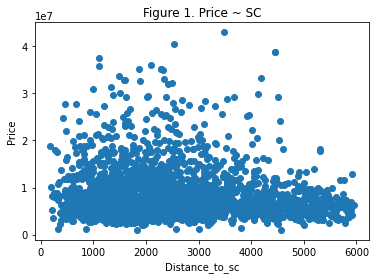

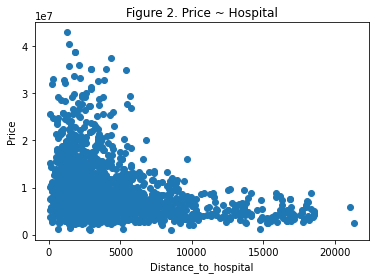

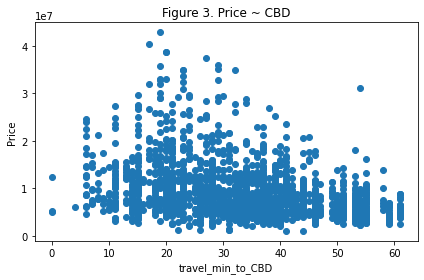

In [88]:
plot1 = plt.figure(1)
plt.scatter(reshapingData['Distance_to_sc'],reshapingData['price'])
plt.xlabel('Distance_to_sc')
plt.ylabel('Price')
plt.title('Figure 1. Price ~ SC')

plot2 = plt.figure(2)
plt.scatter(reshapingData['Distance_to_hospital'],reshapingData['price'])
plt.xlabel('Distance_to_hospital')
plt.ylabel('Price')
plt.title('Figure 2. Price ~ Hospital')

plot3 = plt.figure(3)
plt.scatter(reshapingData['travel_min_to_CBD'],reshapingData['price'])
plt.xlabel('travel_min_to_CBD')
plt.ylabel('Price')
plt.title('Figure 3. Price ~ CBD')

plt.tight_layout()

So far, none of the scatter plots shows a clear linear relationship between the features and the target variable. However, it is very clear that the ``Price`` and ``Distance_to_hospital`` are not directly linearly related to another, but we can definitely see a curvy linear relationship.

This is due the fact that both variables are heavily skewed to the right, and thus is portraying a shape similar to a power-law function. Similarly, the data points in Figure 1 and Figure 3 are all clustered heavily around the lower area of y-axis due to the fact that ``price`` is heavily skewed to the right. To check the linearity of the features to the target variables, I applied log-log transformation to $Price \sim Hospital$.

In [89]:
reshapingData['log_price'] = reshapingData['price'].apply(lambda x: np.log(x))
# applying natural logarithm to price 
reshapingData['log_hosp'] = reshapingData['Distance_to_hospital'].apply(lambda x: np.log(x))
# applying natural logarithm to Distance_to_hospital

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Distribution of Residuals from Log-Log transformed Model')

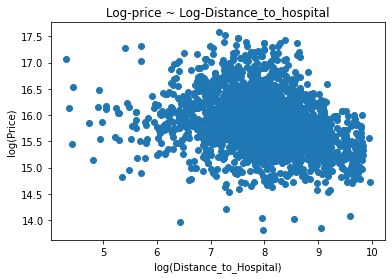

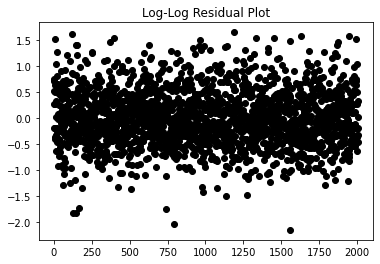

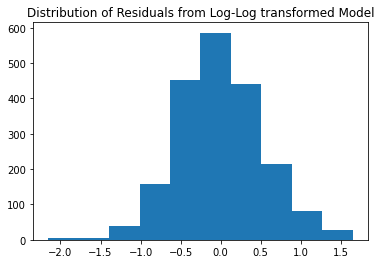

In [90]:
plot1 = plt.figure(1)
plt.scatter(reshapingData['log_hosp'],reshapingData['log_price'])
# scatter plot of Distance_to_hospital and price after applying logarithm to both variables
plt.title('Log-price ~ Log-Distance_to_hospital')
plt.xlabel('log(Distance_to_Hospital)')
plt.ylabel('log(Price)')


reg = LinearRegression().fit(reshapingData[['log_hosp']],reshapingData['log_price'])
# create a linear regression fit between log-price and log-Distance_to_hospital
y_predicted = reg.predict(reshapingData[['log_hosp']])
# predicted log-price from the linear regression model

plot2 = plt.figure(2)
plt.plot(reshapingData['log_price'] - y_predicted, 'o', color='black')
# scatter plot of the residuals 
plt.title('Log-Log Residual Plot')

plot3 = plt.figure(3)
plt.hist(reshapingData['log_price'] - y_predicted)
# historgram of the residuals
plt.title('Distribution of Residuals from Log-Log transformed Model')

After applying log-log transformation to $Price \sim Hospital$, the relationship still does not look perfectly linear. We can see a slight negative correlation between two variables after applying the transformation, but the correlation does not seem too strong. To check the linearity between two transformed variables, I built a simple linear regression between them and created a residual plot using the residual between the predicted $\log{Price}$ and the true $\log{Price}$. From the residual plot, we can see that the centre of the residuals is located at zero, with some outliers outside of the Cook's distance. The historgram portraying the distribution of the residual further proves that the centre of the residuals is at $0$, and the distribution follows Gaussian distribution with some 'fat tails' at both ends. This could be due to the outliers within both variables that the model could not predict correctly. Through this, we can say that the ``distance_to_Hospital`` does satisfy the linearity assumption against ``price``. 

## 2.2 Normality Assumption - Transformation

The transformation of predictor and target variables all affect their shape of the distributions. This is espeically helpful when we need to check the normality of the variables involved in the model. If the distribution of the data points are skewed to the right, we can apply either square-root or log transformation of the variable to check if it becomes more normally distributed. Otherwise, if the distribution is heavily skewed to the left, we can apply either power function or polynomial funciton. 

To start with, I used histogram to visualise the distribution of all the predictor variables and the target variable.

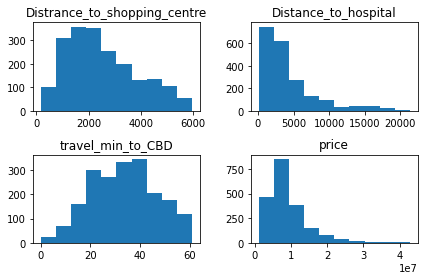

In [91]:
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(reshapingData['Distance_to_sc'])
axs[0,0].set_title('Distrance_to_shopping_centre')

axs[0,1].hist(reshapingData['Distance_to_hospital'])
axs[0,1].set_title('Distance_to_hospital')

axs[1,0].hist(reshapingData['travel_min_to_CBD'])
axs[1,0].set_title('travel_min_to_CBD')

axs[1,1].hist(reshapingData['price'])
axs[1,1].set_title('price')

plt.tight_layout()

The distribution of ``Distance_to_sc``, ``Distance_to_hospital``, and ``price`` are skewed to the right. Especially the latter two variables are heavily skewed to the right side. This could mean that the data points are following either a power or exponential function. To 'normalise' the distribution, we apply inverse function of the forementioned functions. Considering that the aforementioned functions look identical, we need to try out the inverse of both functions to the heavily-right-skewed graphs. Therefore, to satisfy the normality assumption of linear regression model, I applied log-transformation and square-root-transformation to ``Distance_to_sc``, ``Distance_to_hospital``, and ``price``. The distribution of ``travel_min_to_CBD``, on the other hand, looks rather normal and thus do not need to go through particular transformations.

### 2.2.1. Tranforming ``price``

In [92]:
logPrice = reshapingData['log_price']
# data points in 'price' after applying natural logarithm
sqrtPrice = reshapingData['price'].apply(lambda x: sqrt(x))
# applying square root to the 'price' column

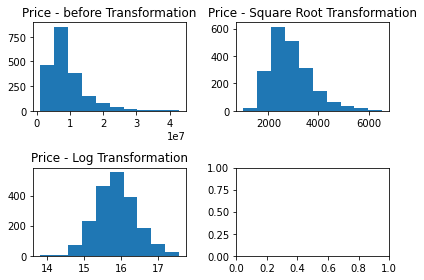

In [93]:
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(reshapingData['price'])
axs[0,0].set_title('Price - before Transformation')

axs[0,1].hist(sqrtPrice)
axs[0,1].set_title('Price - Square Root Transformation')

axs[1,0].hist(logPrice)
axs[1,0].set_title('Price - Log Transformation')

plt.tight_layout()

After applying the tranformation, I plot out all the transformed variables with histograms. The ``price`` variables after applying **logarithm** function looks definitely normal compared to two former graphs. Therefore, the ``price`` variable after applying logarithmic function satisfies the normality assumption. 

### 2.2.2 Transforming ``Distance_to_sc``

In [94]:
logSc = reshapingData['Distance_to_sc'].apply(lambda x: np.log(x))
# applying natural log funciton to data points in 'Distance_to_sc' attribute 
sqrtSc = reshapingData['Distance_to_sc'].apply(lambda x: sqrt(x))
# applying square root to the same attribute 

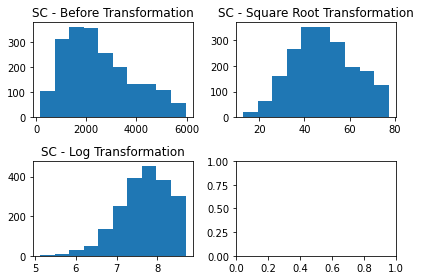

In [95]:
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(reshapingData['Distance_to_sc'])
axs[0,0].set_title('SC - Before Transformation')

axs[0,1].hist(sqrtSc)
axs[0,1].set_title('SC - Square Root Transformation')

axs[1,0].hist(logSc)
axs[1,0].set_title('SC - Log Transformation')

plt.tight_layout()

After applying the tranformation, I plot out all the transformed variables with histograms. The ``Distance_to_sc`` variable after applying **square root** function looks definitely normal compared to other two graphs. Therefore, the ``Distance_to_sc`` variable after applying square root function satisfies the normality assumption. 

### 2.2.3 Transformoing ``Distance_to_hospital``

In [96]:
logHosp = reshapingData['Distance_to_hospital'].apply(lambda x: np.log(x))
# applying natural logarithm to Distance_to_hospital
sqrtHosp = reshapingData['Distance_to_hospital'].apply(lambda x: sqrt(x))
# applying square root to Distance_to_hospital 

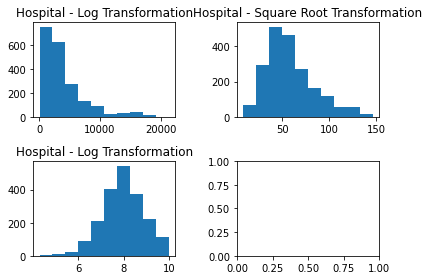

In [97]:
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(reshapingData['Distance_to_hospital'])
axs[0,0].set_title('Hospital - Log Transformation')

axs[0,1].hist(sqrtHosp)
axs[0,1].set_title('Hospital - Square Root Transformation')

axs[1,0].hist(logHosp)
axs[1,0].set_title('Hospital - Log Transformation')

plt.tight_layout()

For ``Distance_to_Hospital``, the distribution of the transformed variables definitely look closer to Gaussian distribution than the original data points. However, unlike the other attributes above, the ``Distance_to_Hospital`` after both transformations does not show a clear normal distributions. To further explore the distribution of the two transformed variables, I used QQplot to check which one is 'closer' to a normal distribution. 

<Figure size 432x288 with 0 Axes>

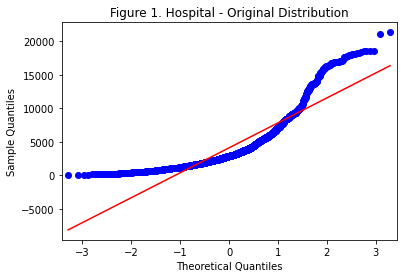

<Figure size 432x288 with 0 Axes>

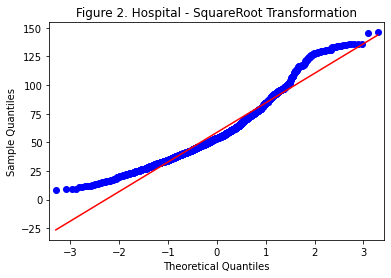

<Figure size 432x288 with 0 Axes>

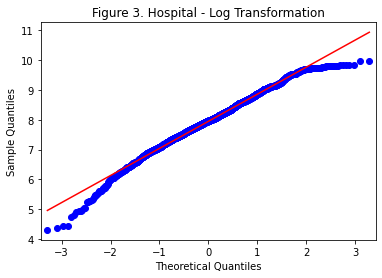

In [98]:
plot1 = plt.figure(1)
qqplot(reshapingData['Distance_to_hospital'],line='s')
plt.title('Figure 1. Hospital - Original Distribution')
plt.show()

plot3 = plt.figure(3)
qqplot(sqrtHosp,line='s')
plt.title('Figure 2. Hospital - SquareRoot Transformation')
plt.show()

plot2 = plt.figure(2)
qqplot(logHosp,line='s')
plt.title('Figure 3. Hospital - Log Transformation')
plt.show()

In the QQplots above, the red line is a representation of a perfectly normal distribution. The more the data points are aligned to the red line, the more normal the distribution of an attribute. The two ends of the blue dots that deviate from the red lines implies possible outliers in the data set. If the data points on two ends of the blue dot sare at the right side of the red line, the distribution is skewed to the right, and vice versa. If the blue dots are deviating at both ends of the red line, the distribution of the data points are accompanied by 'fat tails', which implies outliers at both sides of the tail. 

Based on the QQplot of the ``Distance_to_hospital`` before and after two transformations, we can see that the data points in Figure 3 is more aligned with the red dots, despite its skewness to the right. Figure 2 implies outliers at both ends of the curve, yet the distribution is not as normal as that of Figure 3. Therefore, we can assume that the logarithmic transformation of ``Disntance_to_hospital`` is closer to 'normal'. 

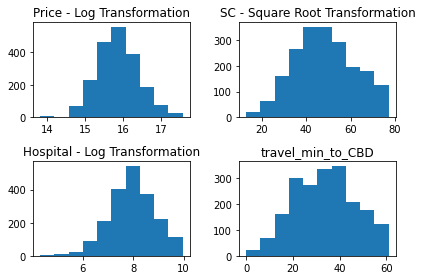

In [99]:
fig, axs = plt.subplots(2, 2)

axs[0,0].hist(logPrice)
axs[0,0].set_title('Price - Log Transformation')

axs[0,1].hist(sqrtSc)
axs[0,1].set_title('SC - Square Root Transformation')

axs[1,0].hist(logHosp)
axs[1,0].set_title('Hospital - Log Transformation')

axs[1,1].hist(reshapingData['travel_min_to_CBD'])
axs[1,1].set_title('travel_min_to_CBD')

plt.tight_layout()

With each trasnsformation above, the distribution of four attributes look much closer to the normal distribution than before. This satisfies the assumption of normality of all variables involved in the linear regression model that we are planning to build.

In [100]:
reshapingData['sqrt_SC'] = sqrtSc
reshapingData['log_hosp'] = logHosp

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 2.3 Scaling

Scaling in a linear regression model is taken into account in the parameter prediction process. In a linear regression model, the prediction in the model is **not** affected greatly due to the scale. However, the prediction in the parameter will change.

In a linear regression model, the regression coefficient carries two distinct meanings - <b>weight/importance</b> of the predictor and the <b>scale</b> of the predictor. Without scaling, the importance of the predictor could be undermined or overestimated. In a linear regression model, we aim to <em>minimise</em> the role <b>scale</b> takes in the regression coefficient. Additionally, without scaling, the regression coefficients of some important predictors could be minimised drastically, until it become close to $0$. This could drastically reduce the <em>significance</em> of a predictor (We might not be able to reject hypothesis testing $H_0$ : $\beta_0 = 0$, if the regression coefficient gets closer and closer to $0$ if not scaled). Such shortcomings could be avoided via scaling the attribute before building a model.

We consider two scaling methods in this case - standardisation using z-score and MinMax normalisation. The standardisation method 'standardises' the distribution of the data set with $\mu = 0, \sigma = 1$, while the MinMax scaling fits the range of the data into a set interval based on the problem domain. 

Scaling is implemented after transforming the predictor and target attributes.

In [101]:
mmScale = preprocessing.\
MinMaxScaler().\
fit(reshapingData[['sqrt_SC','travel_min_to_CBD','log_hosp']])
# fit the predictor attributes to MinMax normalisation
mm_dist = mmScale.transform(reshapingData[['sqrt_SC','travel_min_to_CBD','log_hosp']])
# scaling three predictor variables with MinMax scaling

In [102]:
mm_dist[1:10]

array([[0.54937415, 0.32786885, 0.76436849],
       [0.53206369, 0.68852459, 0.5439109 ],
       [0.62675176, 0.24590164, 0.68446392],
       [0.57711216, 0.3442623 , 0.61431472],
       [0.58331482, 0.90163934, 0.80468681],
       [0.54207453, 0.37704918, 0.65053191],
       [0.59023481, 0.59016393, 0.75643441],
       [0.47463176, 0.55737705, 0.69081854],
       [0.74991904, 0.3442623 , 0.49107098]])

In [103]:
reshapingData['mm_sc'] = mm_dist[:,0]
reshapingData['mm_cbd'] = mm_dist[:,1]
reshapingData['mm_hosp'] = mm_dist[:,2]
# create scaled variables

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [104]:
zScale = preprocessing.\
StandardScaler().\
fit(reshapingData[['sqrt_SC','travel_min_to_CBD','log_hosp']])
# fit the predictor variables into standardised scale 
z_dist = zScale.transform(reshapingData[['sqrt_SC','travel_min_to_CBD','log_hosp']])
# scaling three predictor variables with MinMax scaling

In [105]:
z_dist[1:10]

array([[-0.00769054, -1.04706904,  0.75953337],
       [-0.08948055,  0.65149596, -0.61632866],
       [ 0.35791013, -1.43310654,  0.26085396],
       [ 0.12336849, -0.96986154, -0.17694281],
       [ 0.15267538,  1.65519345,  1.01115746],
       [-0.04218045, -0.81544654,  0.04908638],
       [ 0.18537157,  0.18825096,  0.71001728],
       [-0.36084006,  0.03383596,  0.30051271],
       [ 0.93986188, -0.96986154, -0.94609929]])

In [106]:
reshapingData['z_sc'] = z_dist[:,0]
reshapingData['z_cbd'] = z_dist[:,1]
reshapingData['z_hosp'] = z_dist[:,2]
# create standardised variables

/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dahyekim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

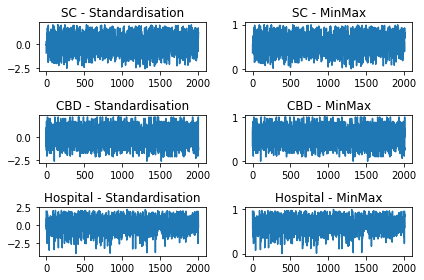

In [107]:
fig, axs = plt.subplots(3, 2)

axs[0,0].plot(reshapingData['z_sc'])
axs[0,0].set_title('SC - Standardisation')

axs[0,1].plot(reshapingData['mm_sc'])
axs[0,1].set_title('SC - MinMax')

axs[1,0].plot(reshapingData['z_cbd'])
axs[1,0].set_title('CBD - Standardisation')

axs[1,1].plot(reshapingData['mm_cbd'])
axs[1,1].set_title('CBD - MinMax')

axs[2,0].plot(reshapingData['z_hosp'])
axs[2,0].set_title('Hospital - Standardisation')

axs[2,1].plot(reshapingData['mm_hosp'])
axs[2,1].set_title('Hospital - MinMax')

plt.tight_layout()

<Figure size 432x288 with 0 Axes>

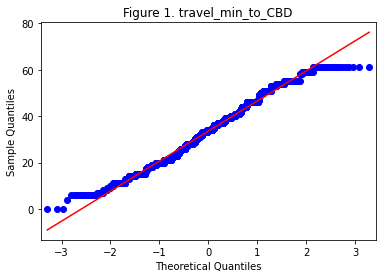

<Figure size 432x288 with 0 Axes>

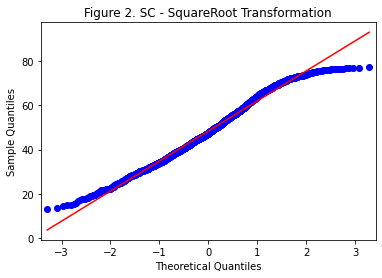

<Figure size 432x288 with 0 Axes>

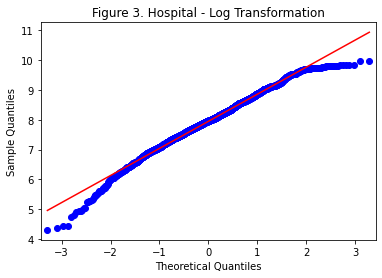

In [108]:
plot1 = plt.figure(1)
qqplot(reshapingData['travel_min_to_CBD'],line='s')
plt.title('Figure 1. travel_min_to_CBD')
plt.show()

plot3 = plt.figure(3)
qqplot(sqrtSc,line='s')
plt.title('Figure 2. SC - SquareRoot Transformation')
plt.show()

plot2 = plt.figure(2)
qqplot(logHosp,line='s')
plt.title('Figure 3. Hospital - Log Transformation')
plt.show()

As shown in the graph above, the distribution of the respective attributes are not changed. However, the key difference between the normalisation and the standardisation is the range/interval of the attributes. The standardised attributes are distributed with the centre at $0$ but different range, while the normalised attributes are remained within the same interval of $[0,1]$. Despite the shape transformation process, we can still see the skewness in the distribution of ``Distance_to_hospital`` attribute. Additionally, based on the histograms of all the transformed attributes and the QQplots above, the variance of the attributes varies and each transformed attributes are accompanied by outliers. In this case, standardisation could be a better choice for us since it does not suppress the effect of outliers in our dataset and maintains the variance level of each attribute. 

# Conclusion 

The program first parsed two data frames in ``json`` and ``xml`` format into a readable data frame and concatenated the parsed data frame into one. Before starting filling out new information, duplicated rows were removed based on the unique ``property_id``. Then the distance between each property and its nearest supermarket, shopping centre, train station, and hospital were obtained and calculated. The geographical coordinates and ID of each location were saved in data frame from different files in various format and they were parsed using appropriate librarie and functions. Then the suburb of the property was obtained using the geographical shape file, where all the suburbs of Victoria and their geographical coordinates were saved. The travel time from each properties to Melbourne City via train were also obtained, and this was achieved by exploring and merging data frames with information on routes, trips, stoptimes, and service operation hours of each train service line. After integrating the data, the data was prepared for building a multiregression model that predicts ``price`` attribute using ``distance_to_sc``, ``distance_to_hospital``, and ``travel_min_to_CBD``. To satisfy the linearity and normality assumption for the multiple regression mode, data transformation, linearity transformation, and standardisation on scaling were implemented.

# Bibliography 

Haversine Formula in Python (Bearing and Distance between two GPS points). (2011, February 6). Stack Overflow. https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points